In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/luminarian/Thinkful-Capstone-3/97f2df7261a9d688911a4b724a289f22a9ee3138/data.csv', encoding= 'unicode_escape')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [35]:
df.describe(include='O')

InvoiceNo StockCode                         Description  \
count     541909    541909                              540455   
unique     25900      4070                                4223   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2313                                2369   

             InvoiceDate  
count             541909  
unique             23260  
top     10/31/2011 14:41  
freq                1114

In [36]:
df.describe()

Quantity      UnitPrice     CustomerID      Australia  \
count  541909.000000  541909.000000  406829.000000  541909.000000   
mean        9.552250       4.611114   15287.690570       0.002323   
std       218.081158      96.759853    1713.600303       0.048144   
min    -80995.000000  -11062.060000   12346.000000       0.000000   
25%         1.000000       1.250000   13953.000000       0.000000   
50%         3.000000       2.080000   15152.000000       0.000000   
75%        10.000000       4.130000   16791.000000       0.000000   
max     80995.000000   38970.000000   18287.000000       1.000000   

             Austria        Bahrain        Belgium         Brazil  \
count  541909.000000  541909.000000  541909.000000  541909.000000   
mean        0.000740       0.000035       0.003818       0.000059   
std         0.027192       0.005921       0.061672       0.007684   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              Canada  Channel Islands  ...            RSA   Saudi Arabia  \
count  541909.000000    541909.000000  ...  541909.000000  541909.000000   
mean        0.000279         0.001399  ...       0.000107       0.000018   
std         0.016690         0.037374  ...       0.010345       0.004296   
min         0.000000         0.000000  ...       0.000000       0.000000   
25%         0.000000         0.000000  ...       0.000000       0.000000   
50%         0.000000         0.000000  ...       0.000000       0.000000   
75%         0.000000         0.000000  ...       0.000000       0.000000   
max         1.000000         1.000000  ...       1.000000       1.000000   

           Singapore          Spain         Sweden    Switzerland  \
count  541909.000000  541909.000000  541909.000000  541909.000000   
mean        0.000423       0.004674       0.000853       0.003694   
std         0.020552       0.068208       0.029186       0.060669   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 USA  United Arab Emirates  United Kingdom    Unspecified  
count  541909.000000         541909.000000   541909.000000  541909.000000  
mean        0.000537              0.000125        0.914320       0.000823  
std         0.023167              0.011201        0.279892       0.028676  
min         0.000000              0.000000        0.000000       0.000000  
25%         0.000000              0.000000        1.000000       0.000000  
50%         0.000000              0.000000        1.000000       0.000000  
75%         0.000000              0.000000        1.000000       0.000000  
max         1.000000              1.000000        1.000000       1.000000  

[8 rows x 41 columns]

In [3]:
countryCodes = pd.get_dummies(df['Country'])
df = pd.concat([df, countryCodes], axis=1)
df = df.drop('Country', axis=1)

In [4]:
subsample = df.sample(n=30000)

In [52]:
transactions = subsample.groupby(['InvoiceNo']).mean()
transactions['Payment'] = transactions['Quantity'] * transactions['UnitPrice']
transactions.describe()

Quantity     UnitPrice    CustomerID     Australia       Austria  \
count  11717.000000  11717.000000  10694.000000  11717.000000  11717.000000   
mean      14.162910      6.062809  15264.978680      0.002390      0.000768   
std       66.793992    105.219112   1722.665952      0.048828      0.027705   
min    -3000.000000      0.000000  12347.000000      0.000000      0.000000   
25%        2.000000      1.350000  13824.500000      0.000000      0.000000   
50%        6.000000      2.225000  15145.500000      0.000000      0.000000   
75%       12.000000      3.954286  16775.750000      0.000000      0.000000   
max     2400.000000   6930.000000  18287.000000      1.000000      1.000000   

       Bahrain       Belgium        Brazil        Canada  Channel Islands  \
count  11717.0  11717.000000  11717.000000  11717.000000     11717.000000   
mean       0.0      0.004779      0.000085      0.000256         0.001536   
std        0.0      0.068971      0.009238      0.016000         0.039166   
min        0.0      0.000000      0.000000      0.000000         0.000000   
25%        0.0      0.000000      0.000000      0.000000         0.000000   
50%        0.0      0.000000      0.000000      0.000000         0.000000   
75%        0.0      0.000000      0.000000      0.000000         0.000000   
max        0.0      1.000000      1.000000      1.000000         1.000000   

       ...  Saudi Arabia     Singapore         Spain        Sweden  \
count  ...       11717.0  11717.000000  11717.000000  11717.000000   
mean   ...           0.0      0.000427      0.005121      0.001536   
std    ...           0.0      0.020654      0.071379      0.039166   
min    ...           0.0      0.000000      0.000000      0.000000   
25%    ...           0.0      0.000000      0.000000      0.000000   
50%    ...           0.0      0.000000      0.000000      0.000000   
75%    ...           0.0      0.000000      0.000000      0.000000   
max    ...           0.0      1.000000      1.000000      1.000000   

        Switzerland           USA  United Arab Emirates  United Kingdom  \
count  11717.000000  11717.000000          11717.000000    11717.000000   
mean       0.003072      0.000427              0.000171        0.896219   
std        0.055347      0.020654              0.013064        0.304989   
min        0.000000      0.000000              0.000000        0.000000   
25%        0.000000      0.000000              0.000000        1.000000   
50%        0.000000      0.000000              0.000000        1.000000   
75%        0.000000      0.000000              0.000000        1.000000   
max        1.000000      1.000000              1.000000        1.000000   

        Unspecified       Payment  
count  11717.000000  11717.000000  
mean       0.000853     26.881032  
std        0.029203    139.494347  
min        0.000000  -6930.000000  
25%        0.000000      6.682500  
50%        0.000000     15.000000  
75%        0.000000     25.200000  
max        1.000000   3380.000000  

[8 rows x 42 columns]

In [51]:
clean_transactions = transactions.copy()
clean_transactions['Quantity'] = clean_transactions['Quantity'][clean_transactions['Quantity'].between(clean_transactions['Quantity'].quantile(.05), clean_transactions['Quantity'].quantile(.95))]
clean_transactions['UnitPrice'] = clean_transactions['UnitPrice'][clean_transactions['UnitPrice'].between(clean_transactions['UnitPrice'].quantile(.05), clean_transactions['UnitPrice'].quantile(.95))]
clean_transactions['Payment'] = clean_transactions['Payment'][clean_transactions['Payment'].between(clean_transactions['Payment'].quantile(.05), clean_transactions['Payment'].quantile(.95))]
clean_transactions = clean_transactions.dropna(axis=0)
clean_transactions.describe()


Quantity    UnitPrice    CustomerID    Australia      Austria  \
count  9053.000000  9053.000000   9053.000000  9053.000000  9053.000000   
mean      8.899053     2.675275  15287.265105     0.001657     0.000994   
std       7.909291     1.797318   1716.580791     0.040674     0.031516   
min       1.000000     0.420000  12347.000000     0.000000     0.000000   
25%       3.000000     1.383333  13870.000000     0.000000     0.000000   
50%       6.666667     2.100000  15189.000000     0.000000     0.000000   
75%      12.000000     3.491667  16791.000000     0.000000     0.000000   
max      48.000000     8.500000  18287.000000     1.000000     1.000000   

       Bahrain      Belgium      Brazil       Canada  Channel Islands  ...  \
count   9053.0  9053.000000  9053.00000  9053.000000      9053.000000  ...   
mean       0.0     0.005302     0.00011     0.000331         0.001546  ...   
std        0.0     0.072626     0.01051     0.018202         0.039297  ...   
min        0.0     0.000000     0.00000     0.000000         0.000000  ...   
25%        0.0     0.000000     0.00000     0.000000         0.000000  ...   
50%        0.0     0.000000     0.00000     0.000000         0.000000  ...   
75%        0.0     0.000000     0.00000     0.000000         0.000000  ...   
max        0.0     1.000000     1.00000     1.000000         1.000000  ...   

       Saudi Arabia    Singapore        Spain       Sweden  Switzerland  \
count        9053.0  9053.000000  9053.000000  9053.000000  9053.000000   
mean            0.0     0.000221     0.005633     0.001326     0.002762   
std             0.0     0.014863     0.074849     0.036386     0.052480   
min             0.0     0.000000     0.000000     0.000000     0.000000   
25%             0.0     0.000000     0.000000     0.000000     0.000000   
50%             0.0     0.000000     0.000000     0.000000     0.000000   
75%             0.0     0.000000     0.000000     0.000000     0.000000   
max             0.0     1.000000     1.000000     1.000000     1.000000   

               USA  United Arab Emirates  United Kingdom  Unspecified  \
count  9053.000000           9053.000000     9053.000000  9053.000000   
mean      0.000331              0.000221        0.899370     0.000663   
std       0.018202              0.014863        0.300854     0.025737   
min       0.000000              0.000000        0.000000     0.000000   
25%       0.000000              0.000000        1.000000     0.000000   
50%       0.000000              0.000000        1.000000     0.000000   
75%       0.000000              0.000000        1.000000     0.000000   
max       1.000000              1.000000        1.000000     1.000000   

           Payment  
count  9053.000000  
mean     18.374458  
std      15.184329  
min       0.750000  
25%       7.800000  
50%      15.225000  
75%      22.900000  
max      90.480000  

[8 rows x 42 columns]

Dropping any rows with null values and clear outliers (5th quantile on low and high side)

In [18]:
scaler = StandardScaler()
scaled_transactions = scaler.fit_transform(clean_transactions)

Scaling data for PCA analysis

In [22]:
pca = PCA(n_components=2)
stock_pca = pca.fit_transform(scaled_transactions)

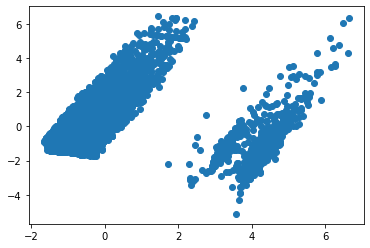

In [23]:
plt.scatter(x=stock_pca[:, 0], y=stock_pca[:, 1])
plt.show()

Looks to be two clusters on the PCA analysis

[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 9053 samples in 0.164s...
[t-SNE] Computed neighbors for 9053 samples in 1.501s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9053
[t-SNE] Computed conditional probabilities for sample 2000 / 9053
[t-SNE] Computed conditional probabilities for sample 3000 / 9053
[t-SNE] Computed conditional probabilities for sample 4000 / 9053
[t-SNE] Computed conditional probabilities for sample 5000 / 9053
[t-SNE] Computed conditional probabilities for sample 6000 / 9053
[t-SNE] Computed conditional probabilities for sample 7000 / 9053
[t-SNE] Computed conditional probabilities for sample 8000 / 9053
[t-SNE] Computed conditional probabilities for sample 9000 / 9053
[t-SNE] Computed conditional probabilities for sample 9053 / 9053
[t-SNE] Mean sigma: 23.028777
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.065823
[t-SNE] KL divergence after 300 iterations: 0.874807


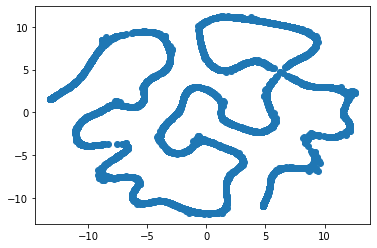

In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=150, n_iter=300)
stock_tsne = tsne.fit_transform(clean_transactions)
plt.scatter(x=stock_tsne[:, 0], y=stock_tsne[:, 1])
plt.show()

Looks to be one mostly long connected line between transaction types using the unscaled data, so attempting to find clustering on the tsne analysis may be difficult

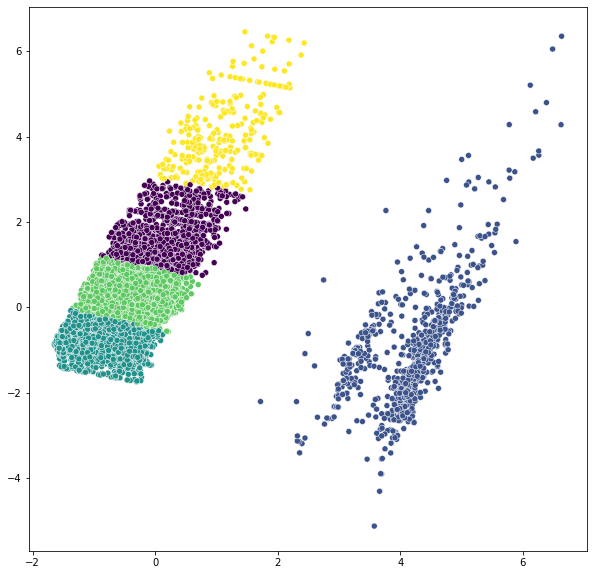

In [48]:
from sklearn.mixture import GaussianMixture

tsne_gmm_cluster = GaussianMixture(n_components=5)
clusters = tsne_gmm_cluster.fit_predict(stock_pca)

plt.figure(figsize=(10, 10))

sns.scatterplot(x=stock_pca[:, 0], y=stock_pca[:, 1], c=clusters)

plt.show()

Now performing analysis on a separate sample

In [38]:
subsample2 = df.sample(n=30000)


In [39]:
transactions2 = subsample2.groupby(['InvoiceNo']).mean()
transactions2['Payment'] = transactions['Quantity'] * transactions['UnitPrice']
transactions2

Quantity  UnitPrice  CustomerID  Australia  Austria  Bahrain  \
InvoiceNo                                                                 
536367          6.0       2.10     13047.0          0        0        0   
536370         17.0       7.39     12583.0          0        0        0   
536375          4.0       4.17     17850.0          0        0        0   
536378          6.0       3.75     14688.0          0        0        0   
536381          5.5       1.55     15311.0          0        0        0   
...             ...        ...         ...        ...      ...      ...   
C581178        -1.0       5.95     15525.0          0        0        0   
C581229       -36.0       2.08     12558.0          0        0        0   
C581390        -3.0       2.55     13081.0          0        0        0   
C581409        -2.0       2.95     12476.0          0        0        0   
C581466        -2.0       4.95     13883.0          0        0        0   

           Belgium  Brazil  Canada  Channel Islands  ...  Saudi Arabia  \
InvoiceNo                                            ...                 
536367           0       0       0                0  ...             0   
536370           0       0       0                0  ...             0   
536375           0       0       0                0  ...             0   
536378           0       0       0                0  ...             0   
536381           0       0       0                0  ...             0   
...            ...     ...     ...              ...  ...           ...   
C581178          0       0       0                0  ...             0   
C581229          0       0       0                0  ...             0   
C581390          0       0       0                0  ...             0   
C581409          0       0       0                0  ...             0   
C581466          0       0       0                0  ...             0   

           Singapore  Spain  Sweden  Switzerland  USA  United Arab Emirates  \
InvoiceNo                                                                     
536367             0      0       0            0    0                     0   
536370             0      0       0            0    0                     0   
536375             0      0       0            0    0                     0   
536378             0      0       0            0    0                     0   
536381             0      0       0            0    0                     0   
...              ...    ...     ...          ...  ...                   ...   
C581178            0      0       0            0    0                     0   
C581229            0      0       0            0    1                     0   
C581390            0      0       0            0    0                     0   
C581409            0      0       0            0    0                     0   
C581466            0      0       0            0    0                     0   

           United Kingdom  Unspecified  Payment  
InvoiceNo                                        
536367                  1            0      NaN  
536370                  0            0    51.45  
536375                  1            0     6.36  
536378                  1            0      NaN  
536381                  1            0     4.20  
...                   ...          ...      ...  
C581178                 1            0      NaN  
C581229                 0            0   -20.80  
C581390                 1            0      NaN  
C581409                 0            0    -5.90  
C581466                 1            0      NaN  

[11710 rows x 42 columns]

In [40]:
clean_transactions2 = transactions2.copy()
clean_transactions2['Quantity'] = clean_transactions2['Quantity'][clean_transactions2['Quantity'].between(clean_transactions2['Quantity'].quantile(.05), clean_transactions2['Quantity'].quantile(.95))]
clean_transactions2['UnitPrice'] = clean_transactions2['UnitPrice'][clean_transactions2['UnitPrice'].between(clean_transactions2['UnitPrice'].quantile(.05), clean_transactions2['UnitPrice'].quantile(.95))]
clean_transactions2['Payment'] = clean_transactions2['Payment'][clean_transactions2['Payment'].between(clean_transactions2['Payment'].quantile(.05), clean_transactions2['Payment'].quantile(.95))]
clean_transactions2 = clean_transactions2.dropna(axis=0)
clean_transactions2

Quantity  UnitPrice  CustomerID  Australia  Austria  Bahrain  \
InvoiceNo                                                                 
536370         17.0      7.390     12583.0          0        0        0   
536375          4.0      4.170     17850.0          0        0        0   
536381          5.5      1.550     15311.0          0        0        0   
536382          8.0      2.950     16098.0          0        0        0   
536384          3.0      6.450     18074.0          0        0        0   
...             ...        ...         ...        ...      ...      ...   
581496          4.0      4.950     16558.0          0        0        0   
581501          4.0      3.950     12985.0          0        0        0   
581538          1.0      2.186     14446.0          0        0        0   
581570         12.0      1.250     12662.0          0        0        0   
581587          8.0      1.950     12680.0          0        0        0   

           Belgium  Brazil  Canada  Channel Islands  ...  Saudi Arabia  \
InvoiceNo                                            ...                 
536370           0       0       0                0  ...             0   
536375           0       0       0                0  ...             0   
536381           0       0       0                0  ...             0   
536382           0       0       0                0  ...             0   
536384           0       0       0                0  ...             0   
...            ...     ...     ...              ...  ...           ...   
581496           0       0       0                0  ...             0   
581501           0       0       0                0  ...             0   
581538           0       0       0                0  ...             0   
581570           0       0       0                0  ...             0   
581587           0       0       0                0  ...             0   

           Singapore  Spain  Sweden  Switzerland  USA  United Arab Emirates  \
InvoiceNo                                                                     
536370             0      0       0            0    0                     0   
536375             0      0       0            0    0                     0   
536381             0      0       0            0    0                     0   
536382             0      0       0            0    0                     0   
536384             0      0       0            0    0                     0   
...              ...    ...     ...          ...  ...                   ...   
581496             0      0       0            0    0                     0   
581501             0      0       0            0    0                     0   
581538             0      0       0            0    0                     0   
581570             0      0       0            0    0                     0   
581587             0      0       0            0    0                     0   

           United Kingdom  Unspecified    Payment  
InvoiceNo                                          
536370                  0            0  51.450000  
536375                  1            0   6.360000  
536381                  1            0   4.200000  
536382                  1            0  29.900000  
536384                  1            0  44.922222  
...                   ...          ...        ...  
581496                  1            0   9.360000  
581501                  1            0  27.328889  
581538                  1            0   3.180000  
581570                  0            0  13.200000  
581587                  0            0  15.800000  

[6142 rows x 42 columns]

In [41]:
scaled_transactions2 = scaler.transform(clean_transactions)

In [42]:
stock_pca2 = pca.transform(scaled_transactions2)

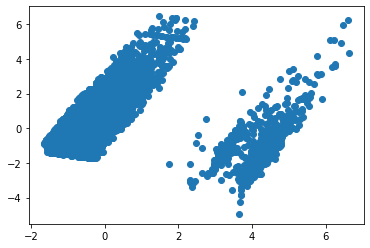

In [43]:
plt.scatter(x=stock_pca2[:, 0], y=stock_pca2[:, 1])
plt.show()

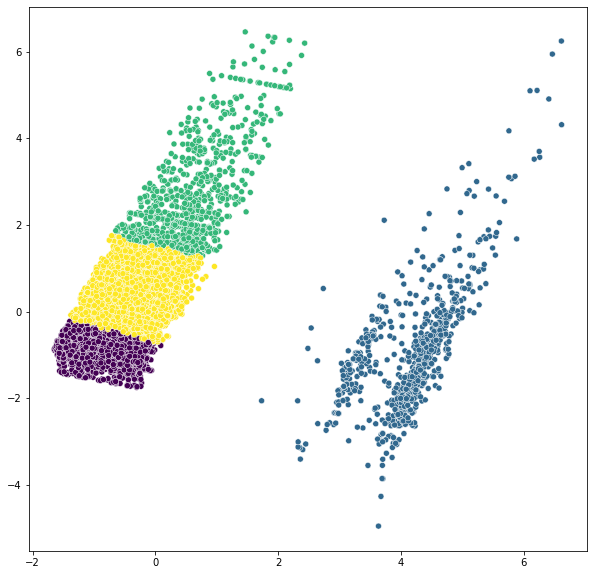

In [61]:
from sklearn.mixture import GaussianMixture

tsne_gmm_cluster = GaussianMixture(n_components=4)
clusters2 = tsne_gmm_cluster.fit_predict(stock_pca2)

plt.figure(figsize=(10, 10))

sns.scatterplot(x=stock_pca2[:, 0], y=stock_pca2[:, 1], c=clusters2)

plt.show()

Very similar clustering on new data

In [62]:
it = pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(stock_pca2)), columns=clean_transactions2.columns)
it['cluster'] = clusters2
aggregate = it.groupby('cluster').mean()
aggregate

Quantity  UnitPrice    CustomerID  Australia   Austria  \
cluster                                                            
0         2.323234   3.025047  15779.126676  -0.000205  0.000162   
1        11.195747   3.013327  12054.041818   0.015925  0.009854   
2        24.072986   1.681733  15392.466418   0.000437 -0.000558   
3         9.962171   2.558496  15608.419712   0.000176  0.000007   

              Bahrain   Belgium    Brazil    Canada  Channel Islands  ...  \
cluster                                                               ...   
0       -1.559348e-18  0.000235 -0.000311  0.000201         0.000288  ...   
1       -2.229147e-18  0.052216  0.000911  0.002069         0.011766  ...   
2        4.721908e-18 -0.001295  0.000817 -0.000053         0.000488  ...   
3        6.151267e-19  0.000213  0.000093  0.000131         0.000470  ...   

         Saudi Arabia  Singapore     Spain    Sweden  Switzerland       USA  \
cluster                                                                       
0                 0.0  -0.000228  0.003673  0.001682    -0.002347 -0.000003   
1                 0.0   0.002077  0.053099  0.013705     0.024783  0.003134   
2                 0.0   0.000567 -0.008793 -0.004563     0.006352  0.000016   
3                 0.0   0.000071 -0.000172 -0.000369     0.000939  0.000034   

         United Arab Emirates  United Kingdom  Unspecified    Payment  
cluster                                                                
0                   -0.000047        1.000244     0.000243   7.577853  
1                    0.001456        0.072073     0.005640  25.356196  
2                    0.000376        0.987467    -0.000325  41.987274  
3                    0.000115        0.986726     0.000098  19.699721  

[4 rows x 42 columns]

In [65]:
it.cluster.value_counts()/it.cluster.value_counts().sum()

3    0.457749
0    0.341102
1    0.100630
2    0.100519
Name: cluster, dtype: float64

In [68]:
aggregate2 = it.groupby('cluster').sum()
aggregate2['Payment']/aggregate2['Payment'].sum()

cluster
0    0.140675
1    0.138866
2    0.229695
3    0.490764
Name: Payment, dtype: float64

Division between classes is focused on spending amounts, quantities and total purchase value